
Accuracy: 0.9737

Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      7393
           1       0.99      0.96      0.97      8064

    accuracy                           0.97     15457
   macro avg       0.97      0.97      0.97     15457
weighted avg       0.97      0.97      0.97     15457



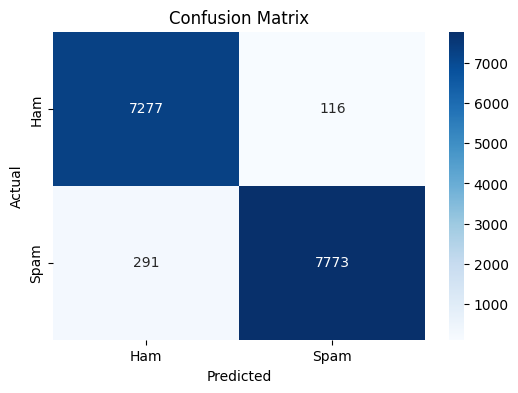

Dự đoán: Không phải spam


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Đọc dữ liệu từ file CSV hoặc nguồn dữ liệu có sẵn
df = pd.read_csv("cleaned_data.csv")  # Thay "data.csv" bằng đường dẫn file thực tế

# Loại bỏ các dòng có giá trị NaN trong cột 'text'
df = df.dropna(subset=['text'])

X = df['text']
y = df['label']

# Chia dữ liệu thành tập train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Áp dụng TF-IDF
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Huấn luyện mô hình Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Dự đoán
y_pred = model.predict(X_test_tfidf)

# Đánh giá mô hình
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

print(f'\nAccuracy: {accuracy:.4f}\n')
print('Classification Report:\n')
print(report)

# Hiển thị ma trận nhầm lẫn
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Dự đoán email từ người dùng
while True:
    user_input = input("Nhập nội dung email để kiểm tra (hoặc nhập 'exit' để thoát): ")
    if user_input.lower() == 'exit':
        break
    user_input_tfidf = vectorizer.transform([user_input])
    prediction = model.predict(user_input_tfidf)[0]
    print("Dự đoán: Spam" if prediction == 1 else "Dự đoán: Không phải spam")
